In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EMPLOYEE ATTRITION ANALYSIS

## PROJECT ABSTRACT : -

**Employee attrition** refers to the gradual reduction of a company's workforce through various means, such as resignations, retirements, layoffs, or other forms of employee departure.

Analyzing employee attrition is crucial for several reasons:-

**Understanding the Causes :** By analyzing attrition, companies can identify the underlying reasons why employees leave. This can include factors such as job dissatisfaction, inadequate compensation, lack of career growth, poor management, or work-life balance issues.

**Reducing Costs :** High attrition rates can be costly due to the expenses associated with recruiting, hiring, and training new employees. By analyzing and addressing the root causes of attrition, companies can reduce these costs and improve their bottom line.

**Improving Employee Retention :** Attrition analysis helps in developing strategies to retain employees, such as improving working conditions, offering competitive salaries, and providing career development opportunities.

**Predicting Future Trends :** Analyzing historical attrition data can help predict future trends and prepare for potential workforce changes. This proactive approach enables better resource planning and succession management.

## COLUMN DETAILS

**Age**: The age of the employee (integer).

**Attrition**: Whether the employee has left the company or not (object).

**BusinessTravel**: Frequency of business travel (object).

**DailyRate**: The daily rate of pay for the employee (integer).

**Department**: Department in which the employee works (object).

**DistanceFromHome**: Distance from home to work in miles (integer).

**Education**: Level of education of the employee (integer).

**EducationField**: Field of education of the employee (object).

**EmployeeCount**: Number of employees (always 1) (integer).

**EmployeeNumber**: Unique identifier for each employee (integer).

**EnvironmentSatisfaction**: Satisfaction level with the work environment (integer).

**Gender**: Gender of the employee (object).
HourlyRate: Hourly rate of pay for the employee (integer).

**JobInvolvement**: Level of job involvement (integer).

**JobLevel**: Level of job within the company (integer).

**JobRole**: Role of the employee in the company (object).

**JobSatisfaction**: Satisfaction level with the job (integer).

**MaritalStatus**: Marital status of the employee (object).

**MonthlyIncome**: Monthly income of the employee (integer).

**MonthlyRate**: Monthly rate of pay for the employee (integer).

**NumCompaniesWorked**: Number of companies the employee has worked for (integer).

**Over18**: Whether the employee is over 18 years old (object).

**OverTime**: Whether the employee works overtime or not (object).

**PercentSalaryHike**: Percentage increase in salary (integer).

**PerformanceRating**: Performance rating of the employee (integer).

**RelationshipSatisfaction**: Satisfaction level with work relationships (integer).

**StandardHours**: Standard number of working hours (always 80) (integer).

**StockOptionLevel**: Level of stock option (integer).

**TotalWorkingYears**: Total number of years worked (integer).

**TrainingTimesLastYear**: Number of training sessions attended last year (integer).

**WorkLifeBalance**: Level of work-life balance (integer).

**YearsAtCompany**: Number of years spent at the company (integer).

**YearsInCurrentRole**: Number of years in the current role (integer).

**YearsSinceLastPromotion**: Number of years since the last promotion (integer).

**YearsWithCurrManager**: Number of years with the current manager (integer).

## IMPORTING LIBARARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



### Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

 *Show the dimensionality of the dataframe*

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

*The data type of each column*

In [ ]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


*Check if there is null values or not*

In [ ]:
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


*Chcek repeated rows*

In [ ]:
df.duplicated().sum()

0

*Categorical Columns*

In [ ]:
cat = df.select_dtypes(['object']).columns

cat


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

*Numerical Columns*

In [ ]:
num = df.select_dtypes(['number']).columns

num

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

*Show the number of unique observations for each column*

In [ ]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


*PrintUnique values of categorical columns*

In [ ]:
for i in cat:
  print("unique values of:" ,i,set(df[i]))

unique values of: Attrition {'Yes', 'No'}
unique values of: BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
unique values of: Department {'Research & Development', 'Human Resources', 'Sales'}
unique values of: EducationField {'Technical Degree', 'Other', 'Marketing', 'Medical', 'Life Sciences', 'Human Resources'}
unique values of: Gender {'Male', 'Female'}
unique values of: JobRole {'Manufacturing Director', 'Research Scientist', 'Manager', 'Healthcare Representative', 'Laboratory Technician', 'Sales Representative', 'Human Resources', 'Sales Executive', 'Research Director'}
unique values of: MaritalStatus {'Single', 'Married', 'Divorced'}
unique values of: Over18 {'Y'}
unique values of: OverTime {'Yes', 'No'}


*StandardHours is 80 for everyone , EmployeeCount and Over18 is 1 for everyone*

*We delete these variable from the dataset*

In [ ]:
df = df.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1)

### Target Column

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


Text(0.5, 1.0, 'Attrition Values')

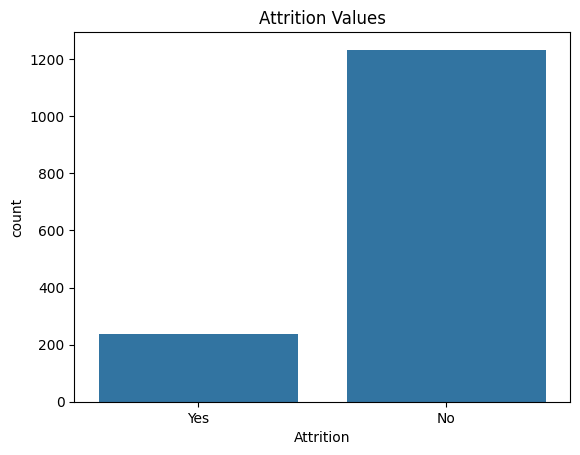

In [ ]:
sns.countplot(x=df['Attrition'])
plt.title("Attrition Values")

In [ ]:
df['Attrition'] = df["Attrition"].map({"Yes":0,"No":1})

*select all categorical values to graph  chart*

In [ ]:
cat_cols = df.select_dtypes(["object"]).columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

                   BusinessTravel      Ratio
BusinessTravel                              
Travel_Rarely                1043  70.952381
Travel_Frequently             277  18.843537
Non-Travel                    150  10.204082


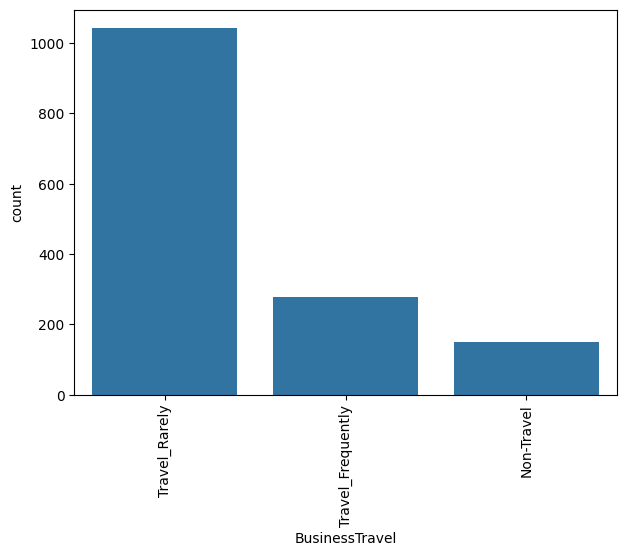

------------------------------------------------------
                        Department      Ratio
Department                                   
Research & Development         961  65.374150
Sales                          446  30.340136
Human Resources                 63   4.285714


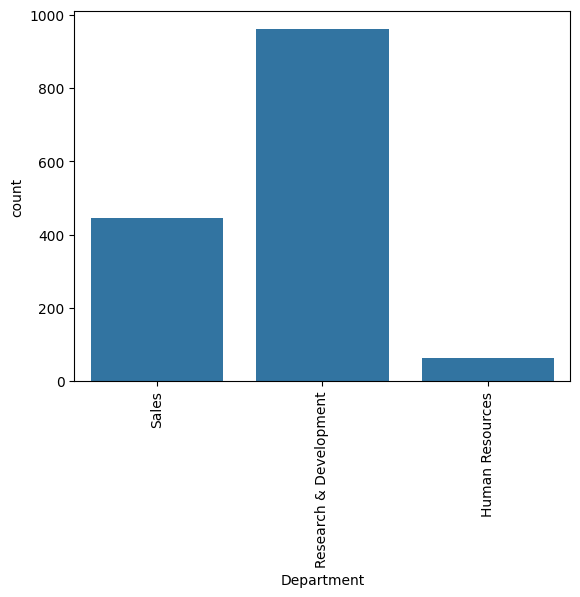

------------------------------------------------------
                  EducationField      Ratio
EducationField                             
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735


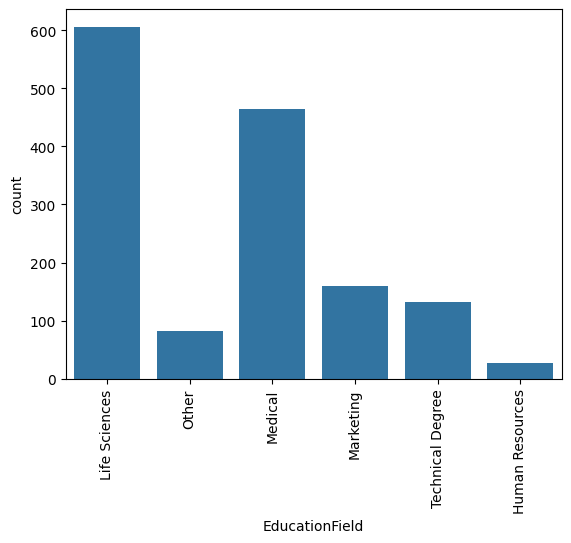

------------------------------------------------------
        Gender  Ratio
Gender               
Male       882   60.0
Female     588   40.0


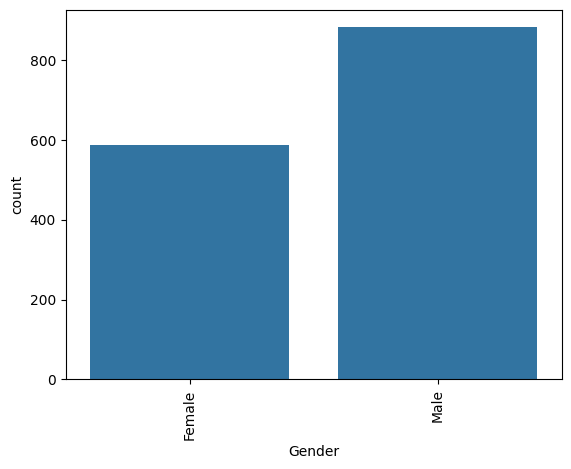

------------------------------------------------------
                           JobRole      Ratio
JobRole                                      
Sales Executive                326  22.176871
Research Scientist             292  19.863946
Laboratory Technician          259  17.619048
Manufacturing Director         145   9.863946
Healthcare Representative      131   8.911565
Manager                        102   6.938776
Sales Representative            83   5.646259
Research Director               80   5.442177
Human Resources                 52   3.537415


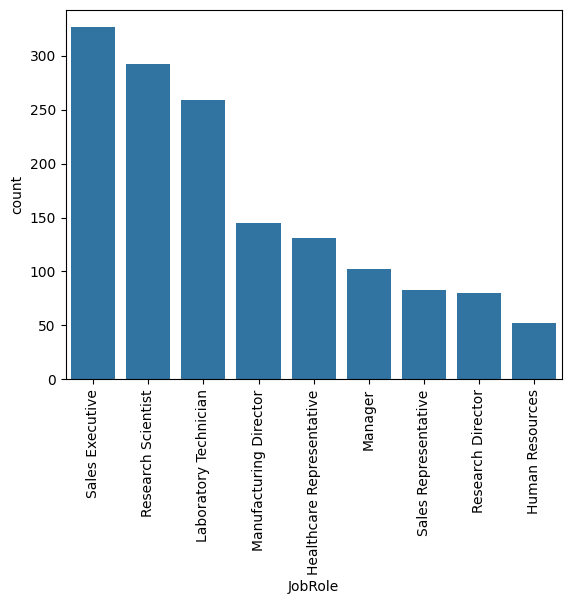

------------------------------------------------------
               MaritalStatus      Ratio
MaritalStatus                          
Married                  673  45.782313
Single                   470  31.972789
Divorced                 327  22.244898


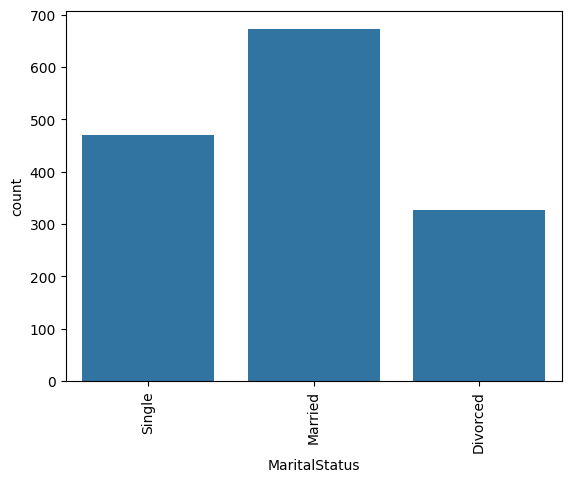

------------------------------------------------------
          OverTime     Ratio
OverTime                    
No            1054  71.70068
Yes            416  28.29932


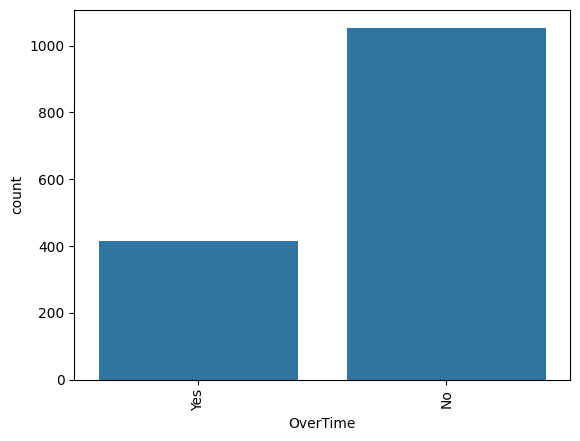

------------------------------------------------------


In [ ]:
plt.figure(figsize=(7, 5))

def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

    if plot:
        ax = sns.countplot(x=df[col_name], data=df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show(block=True)

for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)
        print("------------------------------------------------------")

*Select columns which are categorical except Attrition to graph VS Attrition*

In [ ]:
cat_cols= df.drop('Attrition',axis=1).select_dtypes(['object']).columns
cat_cols


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

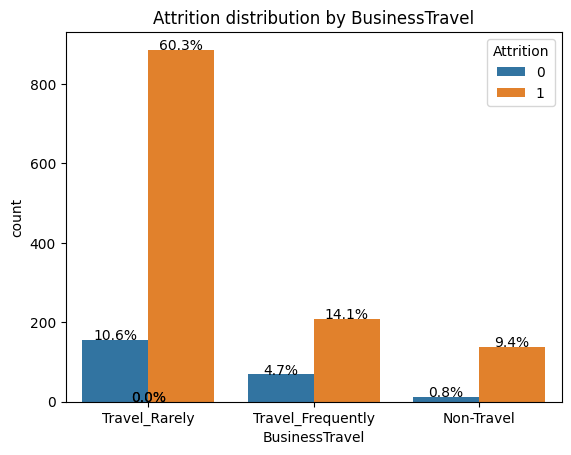

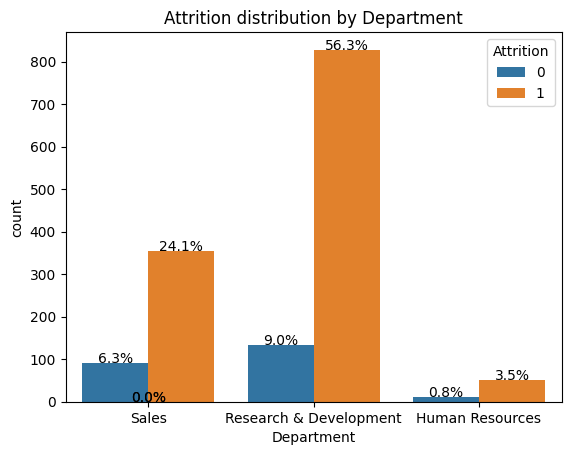

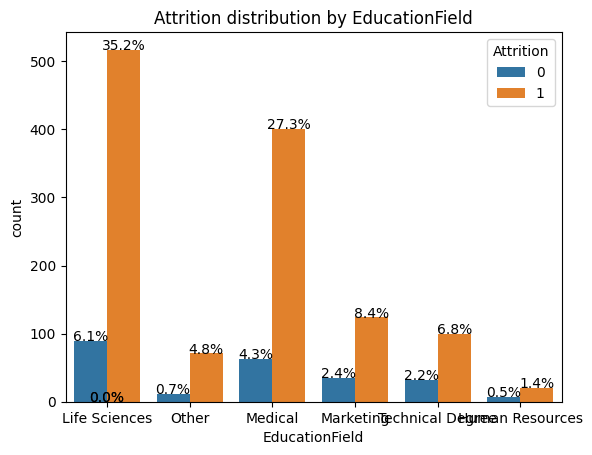

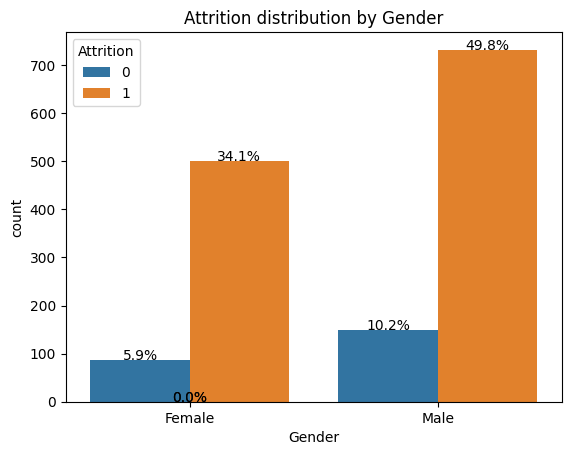

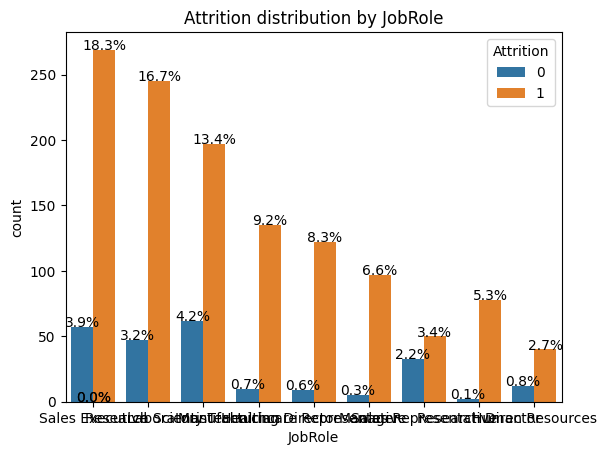

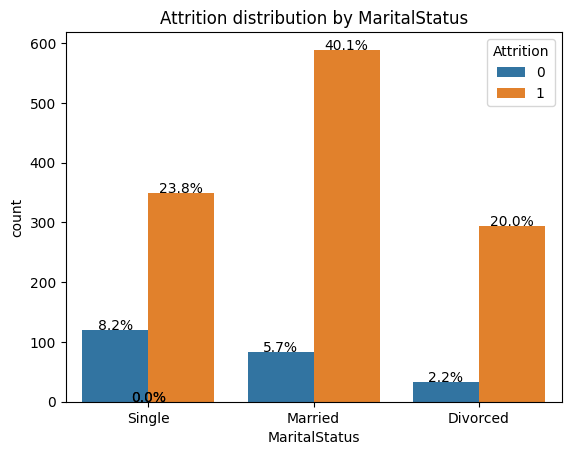

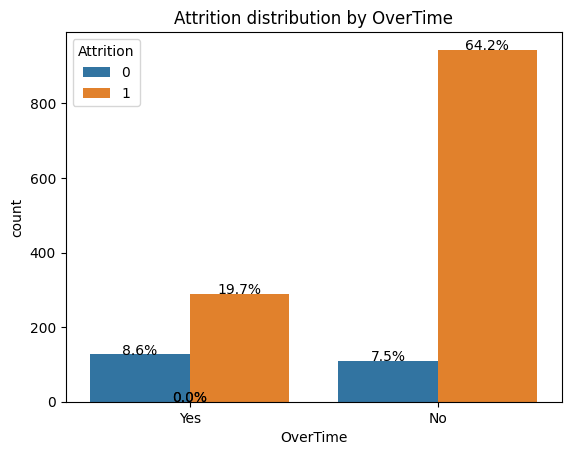

In [ ]:

for col in cat_cols:
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title("Attrition distribution by " + col)

    ax = plt.gca()
    total_height = len(df['Attrition'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()

*Look at the averages of numeric variables for the target variable*

In [ ]:
num_cols = df.select_dtypes(["number"]).columns
num_cols

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Attrition", col)

                 Age
Attrition           
0          33.607595
1          37.561233


           Attrition
Attrition           
0                0.0
1                1.0


            DailyRate
Attrition            
0          750.362869
1          812.504461


           DistanceFromHome
Attrition                  
0                 10.632911
1                  8.915653


           Education
Attrition           
0           2.839662
1           2.927007


           EnvironmentSatisfaction
Attrition                         
0                         2.464135
1                         2.771290


           HourlyRate
Attrition            
0           65.573840
1           65.952149


           JobInvolvement
Attrition                
0                2.518987
1                2.770479


           JobLevel
Attrition          
0          1.637131
1          2.145985


           JobSatisfaction
Attrition                 
0                 2.468354
1                 2.778589


        

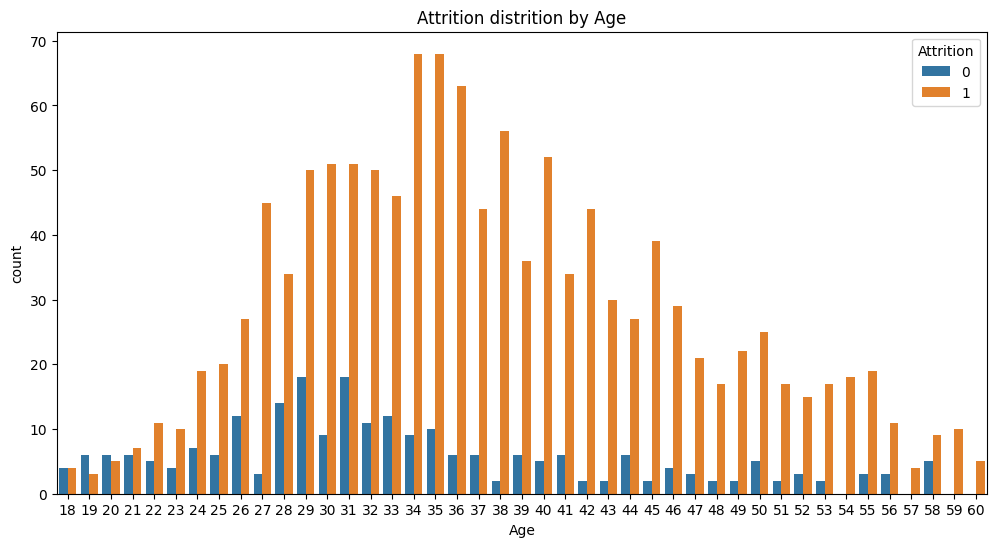

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age", hue='Attrition', data=df)
plt.title("Attrition distrition by Age" )
plt.show()

<Figure size 500x1000 with 0 Axes>

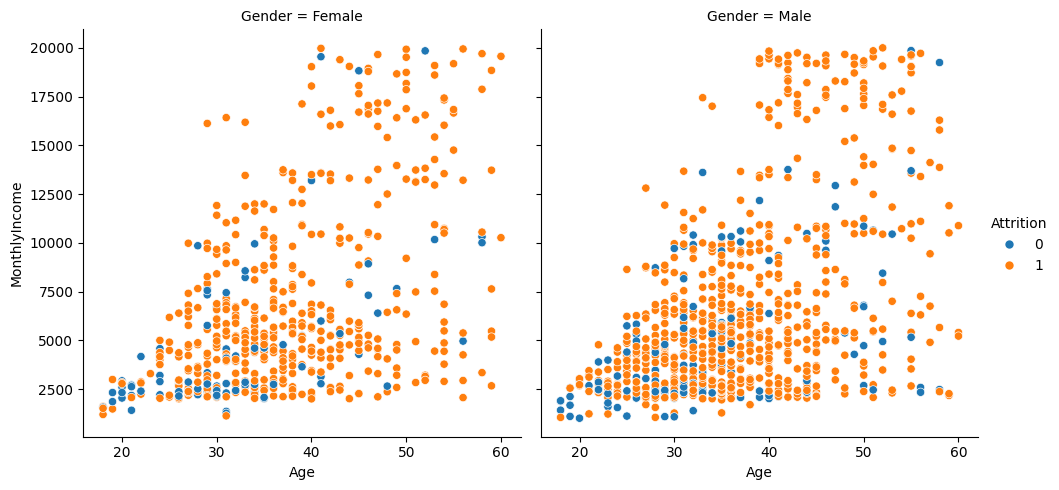

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Age',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

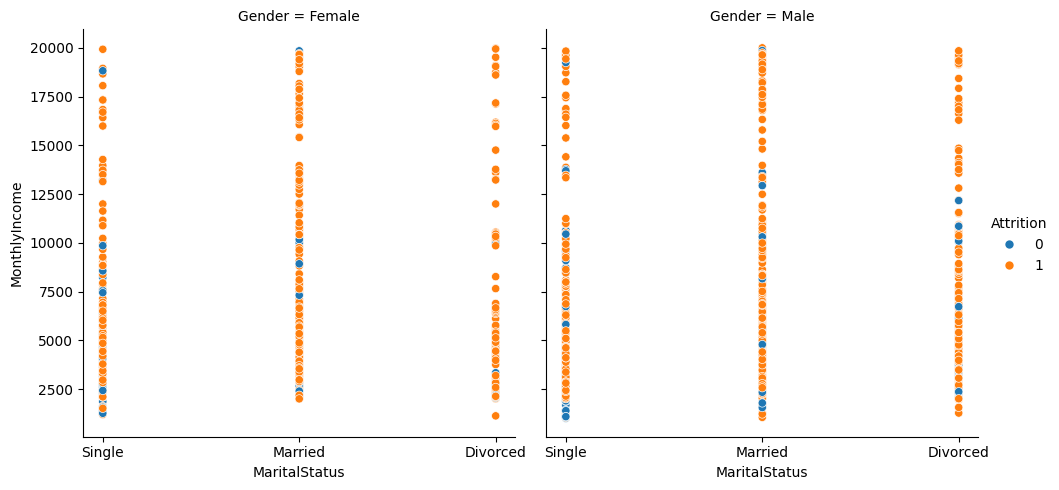

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='MaritalStatus',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

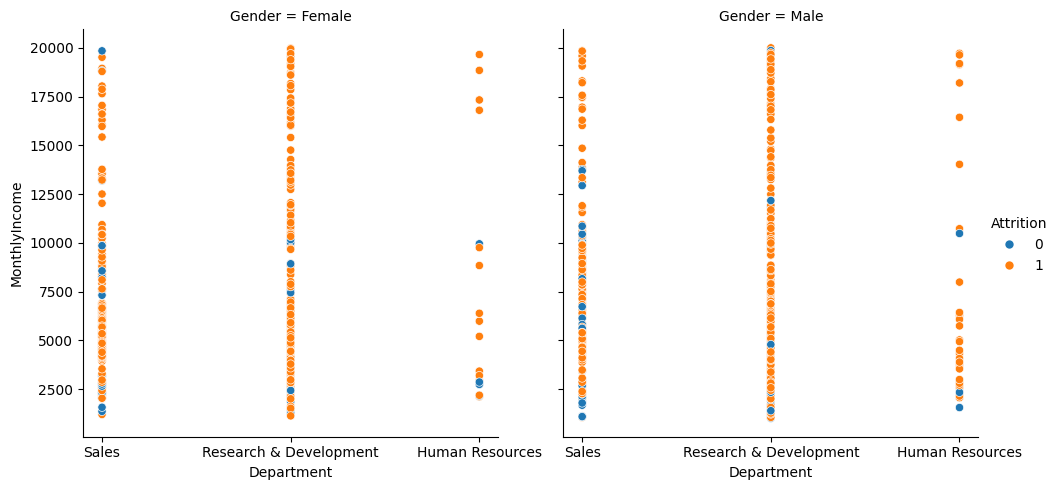

In [ ]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Department',hue='Attrition',col='Gender')
plt.show()

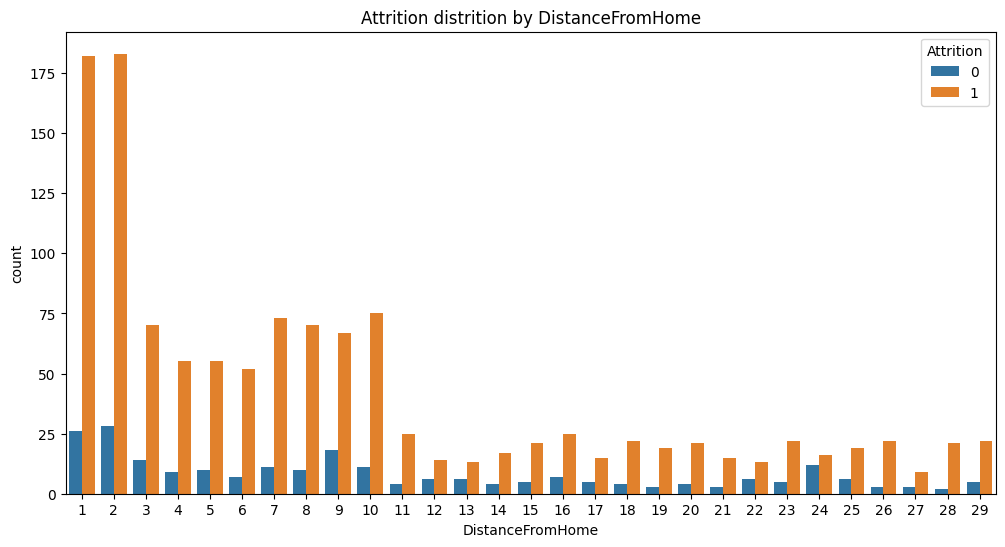

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="DistanceFromHome", hue='Attrition', data=df)
plt.title("Attrition distrition by DistanceFromHome" )
plt.show()

*Encoding categorical values*

In [ ]:

df = df.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

### Split Dataframe into X and Y

In [ ]:
X=df.drop(columns='Attrition')
y=df['Attrition']

### Split Dataframe into train and test

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)
RF_model.score(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print( 'accuracy score: ' ,accuracy_score( y_test , RF_pred))

accuracy score:  0.8695652173913043


Text(95.72222222222221, 0.5, 'True')

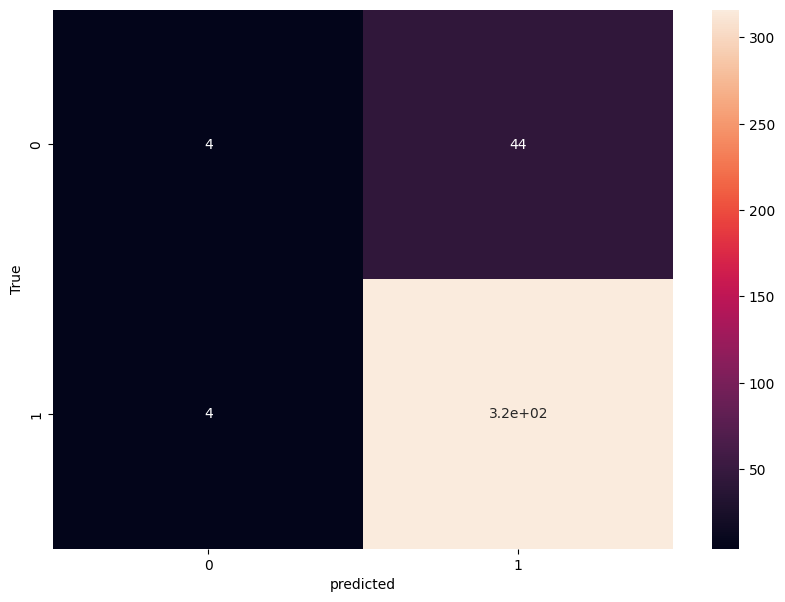

In [70]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('True')
